# Generalized Linear Model

Even though the target, quality, is an ordinal feature,

We'll see.

In [77]:
# Import libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

import statsmodels.api as sm

from sklearn.metrics import accuracy_score

In [23]:
dfInput = pd.read_csv('output/dataReady.csv', index_col = 'idx')

dfTrain = dfInput.loc[dfInput.Set == 'train']
dfVal = dfInput.loc[dfInput.Set == 'valid']

In [4]:
# "ANOVA" Test 
def calculate_nested_f_statistic(small_model, big_model):
    """Given two fitted GLMs, the larger of which contains the parameter space of the smaller, return the F Stat and P value corresponding to the larger model adding explanatory power"""
    addtl_params = big_model.df_model - small_model.df_model
    f_stat = (small_model.deviance - big_model.deviance) / (addtl_params * big_model.scale)
    df_numerator = addtl_params
    # use fitted values to obtain n_obs from model object:
    df_denom = (big_model.fittedvalues.shape[0] - big_model.df_model)
    p_value = stats.f.sf(f_stat, df_numerator, df_denom)
    return (f_stat, p_value)

In [111]:
def glm_metrics(model, df, target):
    aic = model.aic
    results = pd.DataFrame(columns = ['True', 'Predicted', 'RMSE'])
    results['Predicted'] = np.around(model.predict(df))
    results['True'] = df[target]
    results['RMSE'] = np.sqrt((results['True'] - results['Predicted'])**2)
    tab = pd.crosstab(results['True'], results['Predicted'])
    acc = accuracy_score(results['True'], results['Predicted'])
    return (aic, results['RMSE'].mean(), acc, tab, results)

In [119]:
## Model one
# https://stats.stackexchange.com/questions/190763/how-to-decide-which-glm-family-to-use
target = 'quality'
features = ['alcohol']

formula = f'{target}~{"+".join(features)}'

glm_model1 = sm.GLM.from_formula(formula, 
                                 data = dfTrain, 
                                 family=sm.families.Poisson()).fit()


In [120]:
glm_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                quality   No. Observations:                 1107
Model:                            GLM   Df Residuals:                     1105
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2032.8
Date:                Sat, 18 Sep 2021   Deviance:                       94.720
Time:                        20:11:39   Pearson chi2:                     93.4
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0269      0.124      8.259      0.000       0.783       1.271
alcohol        0.0673      0.012      5.699      0.000       0.044       0.090
==============================================================================
"""

<AxesSubplot:ylabel='Density'>

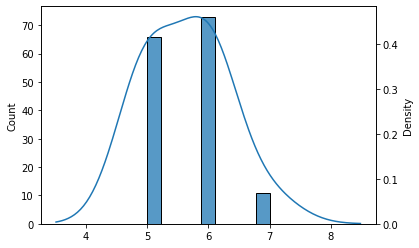

In [100]:
results = np.around(glm_model1.predict(dfVal))
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

sns.histplot(results, ax=ax1)
sns.kdeplot(results, ax=ax2, bw_method=0.8)

In [101]:
glm_metrics(glm_model1, dfVal, 'quality')

(4069.634888039317,
 0.5266666666666666,
 0.52,
 Predicted  5.0  6.0  7.0
 True                    
 4            3    4    0
 5           40   20    2
 6           22   37    7
 7            1   12    1
 8            0    0    1,
       True  Predicted  RMSE
 idx                        
 4        5        5.0   0.0
 11       5        6.0   1.0
 15       5        5.0   0.0
 22       5        5.0   0.0
 24       6        5.0   1.0
 ...    ...        ...   ...
 1580     6        6.0   0.0
 1581     5        6.0   1.0
 1585     6        6.0   0.0
 1594     5        6.0   1.0
 1598     6        6.0   0.0
 
 [150 rows x 3 columns])

In [116]:
## Model two
# https://stats.stackexchange.com/questions/190763/how-to-decide-which-glm-family-to-use
target = 'quality'
features = ['alcohol', 'sulphates']

formula = f'{target}~{"+".join(features)}'

glm_model2 = sm.GLM.from_formula(formula, 
                                 data = dfTrain, 
                                 family=sm.families.Poisson()).fit()

In [117]:
glm_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                quality   No. Observations:                 1107
Model:                            GLM   Df Residuals:                     1104
Model Family:                 Poisson   Df Model:                            2
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2029.5
Date:                Sat, 18 Sep 2021   Deviance:                       88.172
Time:                        20:09:50   Pearson chi2:                     86.8
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9289      0.130      7.132      0.000       0.674       1.184
alcohol        0.0636      0.012      5.345      0.000       0.040       0.087
sulphates      0.2084      0.081      2.584      0.010       0.050       0.367
==============================================================================
"""

In [118]:
glm_metrics(glm_model2, dfVal, 'quality')

(4065.0868870366567,
 0.5,
 0.54,
 Predicted  5.0  6.0  7.0
 True                    
 4            3    4    0
 5           38   23    1
 6           20   40    6
 7            1   10    3
 8            0    0    1,
       True  Predicted  RMSE
 idx                        
 4        5        5.0   0.0
 11       5        6.0   1.0
 15       5        6.0   1.0
 22       5        6.0   1.0
 24       6        5.0   1.0
 ...    ...        ...   ...
 1580     6        6.0   0.0
 1581     5        6.0   1.0
 1585     6        6.0   0.0
 1594     5        6.0   1.0
 1598     6        6.0   0.0
 
 [150 rows x 3 columns])

In [121]:
glm_metrics(glm_model2, dfVal, 'quality')[3]

Predicted,5.0,6.0,7.0
True,,,
4,3,4,0
5,38,23,1
6,20,40,6
7,1,10,3
8,0,0,1
